# Clasificador por minima distacia (Problema 3)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
from numpy import zeros,amin,sqrt,array,trace,sum,genfromtxt

## Defino funcion asignar_grupo() para clasificacion por minima distancia
### Parámetros:
####    Arreglo con los datos a los que les queremos asociar con un grupo o clase
####    Arreglo con los centros de cada una de las clases
### Retorna:
####    Un arreglo con las etiquetas de la clase correspondiente a cada punto y una matriz de la distancia de cada punto a cada centroide

In [2]:
def asignar_grupo(puntos,centros):
    etiquetas = [] #Arreglo para guardar las etiquetas
    distance_matrix = []
    for punto in puntos:
        #Resto cada punto con todos los centros
        diff = punto - centros # diff es una matriz de kxd donde k es el numero de centros y d es la dimension de los puntos
        #Aqui
        #Recorro todas las filas con columna 0 de la matriz diff (todas las coordernadas x) y las multiplico por ellas mismas
        #Recorro todas las filas con columna 1 de la matriz diff (todas las coordenadas y) y las multiplico por ellas mismas
        #Y las sumo, para tener en una nueva matriz de distancias al cuadrado d2 de dimensiones (3x1)
        d2 = diff[:,0]*diff[:,0] + diff[:,1]*diff[:,1]
        d = sqrt(d2) #Saco raíz cuadrada a cada elemento de d2 para obtener las distancias ecuclideas
        distance_matrix.append(d) #Agrego el array de 3 componentes del paso anterior
        minimo =  amin(d) #Encuentro el elemento más pequeño del arrego d
        group = list(d).index(minimo) #Me retorna el índice del arreglo donde se encuentra el minimo
        etiquetas.append(group)
    return array(etiquetas),array(distance_matrix)

## Defino función para encontrar los centros de cada clase
## Parámetros:
###     Arreglo de puntos
###     Arreglo de etiquetas
## Regresa:
###     Arreglo con los centros de cada clase o etiqueta

In [3]:
def centros_de_clase(puntos,etiquetas):
    #Creo un data frame con los puntos, separados por columnas, primera columna X, segunda Y
    df = DataFrame(puntos,columns=["x","y"])
    #Agrego una tercera columa llamada "labels"
    df["labels"] = etiquetas
    #Creo un conjunto "etiquetas de clase" a partir del array etiquetas, ya que así, solo obtengo los valores distintos del arreglo etiquetas
    etiquetas_de_clase = set(etiquetas)
    #Para cada clase, debo realizar el promedio de todos sus puntos y añadirlo a un arreglo para retornar
    centros = []
    for clase in etiquetas_de_clase:
        # Filtro los valores X,Y del data set tales que su etiqueta sea "clase = 0,1,2" y los guardo en matriz_XY
        # Obtengo una matriz de len(puntos)x2, cada columna es la coordenada x e y de los puntos filtrados por clase
        matriz_XY = df[["x","y"]][df.labels == clase]
        vector_de_sumatorias = matriz_XY.sum() #Me devuelve un array con la suma de cada columna
        numero_de_elementos = matriz_XY.count() #Devuelve un array con el numero de elementos de cada columna (son iguales)
        n = numero_de_elementos[0] #Elijo un elemento del array numero de elementos
        centro_de_clase = list(vector_de_sumatorias/n)  #Calculo las coordenadas del centro de la case
        centros.append(centro_de_clase) 
    return array(centros) 

## Importando el training_data de 1000 puntos con 3 clases
## Y test_data de 200 puntos

Text(0.5, 1.0, 'Training_data & test_data')

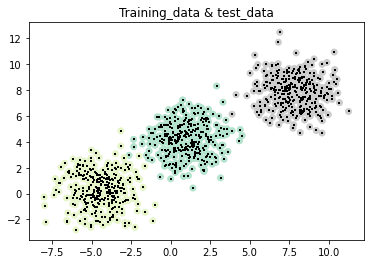

In [15]:
#Se importan los datos como arrays 3D, es decir es una matriz de 1000x3 
ds_training = genfromtxt("dataset3_train.csv",delimiter=',')
# Matriz de 200x3
ds_test = genfromtxt("dataset3_train.csv",delimiter=',')

#Los labels de test y training data se pueden recuperar facilmente invocando la columas con slicing A[:,2] 

training_data = ds_test[:,:-1] #EL data set sin etiquetas
labels_training_data = ds_test[:,2] #Etiquetas del dataset 

test_data = ds_test[:,:-1] #El dataset sin etiquetas
labels_test_data = ds_test[:,2] #Etiquetas del dataset

#Graficando ambos
plt.scatter(training_data[:,0],training_data[:,1],c=labels_test_data,cmap='Pastel2')
plt.scatter(test_data[:,0],test_data[:,1],c='black',s=5,marker='+')
plt.title("Training_data & test_data")


## Localizando centros de cada clase

In [17]:
centros = centros_de_clase(training_data,labels_training_data)

## Aplico clasificación por minima distancia a cada centro de clase

In [18]:
predicted_labels_test_data, distance_matrix = asignar_grupo(test_data,centros)

## Graficando resultados

Text(0.5, 1.0, 'Centros de clase y test data predichos')

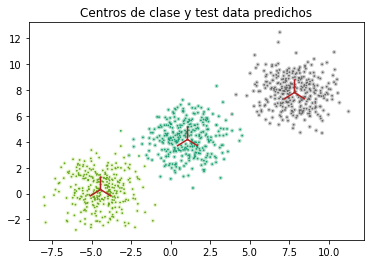

In [22]:
plt.scatter(training_data[:,0],training_data[:,1],c=labels_training_data,s=10,cmap='Pastel2',alpha=0.99)
plt.scatter(test_data[:,0],test_data[:,1],c=predicted_labels_test_data,cmap='Dark2',s=2,marker='.')
plt.scatter(centros[:,0],centros[:,1],c='firebrick', s =700,marker='2')
plt.title("Centros de clase y test data predichos")

## Creando dataFrame para la comparacion de valores

In [26]:
# Creo listas de los nombres de los indices y columnas del dataframe
index = []
for i in range(1000):
    index.append("Punto "+str(i))
#index = ["Punto 1","Punto 2","Punto 3", "Punto 4", "Punto 5","Punto 6","Punto 7","Punto 8", "Punto 9", "Punto 10"]
col = ["Distancia_a_C1", "Distanca_a_C2", "Distancia_a_C3"]
#Creo el dataFrame con la matriz de distancias
df = DataFrame(distance_matrix,index = index ,columns= col)
#Agrego dos columnas al dataframe
df["Predicted label"] = array(predicted_labels_test_data).astype(int)
df["Real label"] = labels_test_data.astype(int)
#Redondeo las distancias a 3 cifras decimales en todo el data frame
df.round(3)

,Distancia_a_C1,Distanca_a_C2,Distancia_a_C3,Predicted label,Real label
Punto 0,8.610,15.153,1.588,2,2
Punto 1,5.344,1.447,13.049,1,1
Punto 2,5.030,1.885,12.739,1,1
Punto 3,2.070,5.137,9.600,0,0
Punto 4,2.685,8.654,6.709,0,0
...,...,...,...,...,...
Punto 995,6.863,1.718,14.546,1,1
Punto 996,6.012,0.768,13.664,1,1
Punto 997,6.785,13.071,2.800,2,2
Punto 998,1.928,8.618,5.878,0,0


# Creando la matriz de confusion 

In [28]:
matriz_de_confusion = confusion_matrix(labels_test_data,predicted_labels_test_data)
clases = ["Clase 0", "Clase 1", "Clase 2"]

dFrame = DataFrame(matriz_de_confusion,index=clases,columns=clases)
dFrame

,Clase 0,Clase 1,Clase 2
Clase 0,333,1,0
Clase 1,2,331,0
Clase 2,1,0,332


### Calculando el Accuracy, que esta dado por:
#### A = (total de aciertos + total de errores)/(total de la poblacion) 

In [29]:
# Hago una suma anidada, porque el metodo sum (A) si A es una matriz, me regresa la suma correspondiente por columas (un array)
# Ahora si vuevo a hacer sum() me retorna la suma de los elementos de un array
# La poblacion es la suma de todos los elementos de la matriz de confusion
poblacion = sum(sum(matriz_de_confusion))
accuracy = trace(matriz_de_confusion)/poblacion
print(f"Accuracy: {accuracy}")

Accuracy: 0.996
